# Notebook zu Blatt 8

In [26]:
import numpy as np      # um zufällige arrays zu generieren
import time             # zur zeitmessung
import seaborn as sns   # zum plotten

from matplotlib import pyplot as plt

####  1. Implementieren Sie Selection Sort und Quicksort in Python

Anhand des Pivot-Elements werden die Elemente des Arrays in zwei Teile geteilt.
Eine geschickte Wahl des Pivot-Elements kann die Laufzeit somit reduzieren.

Für die Implementation von Quicksort wählen wir als Pivot das erste Element des Arrays.
Dies hat den Vorteil, dasss es wenig Implementierungsaufwand erfordert, jedoch liefert jede
sortierte Liste den Worst-Case, da das Pivot-Element immer das kleinste Element des Arrays ist und wir
somit eine Rekursionstiefe mit einer Länge von n-1 erhalten.

Selection Sort hat immer die gleiche Laufzeit, nämlich `(n^2 * n) / 2`

In [27]:
# def selectionSort(array, copy=False):
#     if copy:
#         arr = array.copy()
    
#     else:
#         arr = array

#     for i, _ in enumerate(arr):
#         min = i
#         for j in range(i+1, len(arr)):
#             if arr[j] < arr[min]:
#                 min = j
#         arr[i], arr[min] = arr[min], arr[i]
#     return arr

from selectionsort import selectionSort


In [28]:
array = [7,5,8,1] 
selectionSort(array)
print(array) # das sortierte array

[1, 5, 7, 8]


In [29]:
# def quick_sort_builder(array):
#     if len(array) < 2:
#         return array
    
#     pivot = array[0]
#     less = [i for i in array[1:] if i <= pivot]
#     greater = [i for i in array[1:] if i > pivot]
    
#     return quick_sort_builder(less) + [pivot] + quick_sort_builder(greater)


# def quickSort(array):
#     array[:] = quick_sort_builder(array)

from quicksort import quickSort


In [30]:
array = [7,5,8,1] 
quickSort(array)
print(array) # das sortierte array

[1, 5, 7, 8]


#### 4. Testen Sie die Korrektheit Ihrer Implementierungen anhand von verschiedenen Testfällen

In [31]:
import unittest

from test_sort import TestSorting

unittest.main(argv=[''], verbosity=2, exit=False)


test_quick_sort_big_list (test_sort.TestSorting) ... ok
test_quick_sort_easy_cases (test_sort.TestSorting) ... ok
test_quick_sort_edge_cases (test_sort.TestSorting) ... ok
test_quick_sort_random_lists (test_sort.TestSorting) ... ok
test_selection_sort_big_list (test_sort.TestSorting) ... ok
test_selection_sort_easy_cases (test_sort.TestSorting) ... ok
test_selection_sort_edge_cases (test_sort.TestSorting) ... ok
test_selection_sort_random_lists (test_sort.TestSorting) ... ok

----------------------------------------------------------------------
Ran 8 tests in 12.402s

OK


#### 5. Messen Sie die Laufzeit der beiden Sortieralgorithmen auf Ihrem Rechner.

In [32]:
s_times, q_times = [], []
arrar_sizes =  [10, 100, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7500, 10000] # messung für verschiedenen array-längen
for size in arrar_sizes:
    # ziehe ein zufälliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size) 
    start = time.time()
    
    selectionSort(array)
    end = time.time()
    print("selectionSort: ", end-start)
    s_times.append(end-start) # die zeit in sekunden

    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size) 

    start = time.time()
    
    quickSort(array)

    end = time.time()
    print("quickSort: ", end-start)
    q_times.append(end-start) # die zeit in sekunden

selectionSort:  3.886222839355469e-05
quickSort:  3.24249267578125e-05
selectionSort:  0.0017349720001220703
quickSort:  0.0001938343048095703
selectionSort:  0.037809133529663086
quickSort:  0.0012438297271728516
selectionSort:  0.13098621368408203
quickSort:  0.0017766952514648438
selectionSort:  0.29248833656311035
quickSort:  0.002892017364501953
selectionSort:  0.5051286220550537
quickSort:  0.004447460174560547
selectionSort:  0.7832703590393066
quickSort:  0.004744529724121094
selectionSort:  1.0962777137756348
quickSort:  0.005625247955322266
selectionSort:  3.2093124389648438
quickSort:  0.01023721694946289
selectionSort:  6.602576494216919
quickSort:  0.014579296112060547
selectionSort:  11.967050313949585
quickSort:  0.02772974967956543


#### 6. Erstellen Sie einen geeignent Plot, der die Laufzeit der beiden Algorithmen in Abhängigkeit von der Eingabelänge darstellt

Text(0, 0.5, 'dekadisch logarithmische Laufzeit in Sekunden')

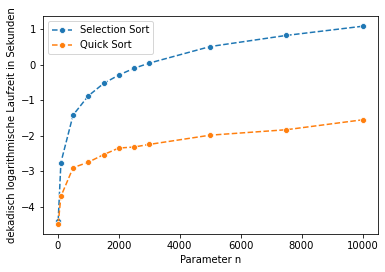

In [33]:
# Hier kommet der Plot!

sns.lineplot(x = arrar_sizes, y = np.log10(s_times), label="Selection Sort", linestyle="dashed", marker="o") 
sns.lineplot(x = arrar_sizes, y = np.log10(q_times), label="Quick Sort", linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("dekadisch logarithmische Laufzeit in Sekunden")


#### 7. Erstellen Sie für die beiden Sortieralgorithmen jeweils einen Plot, in dem gemessene Laufzeit durch die entsprechende asymptotische Laufzeitentwicklung approximiert wird.

Konstante für Selection Sort:  1.1967050313949585e-07
Konstante für Quick Sort:  3.010719317598433e-07


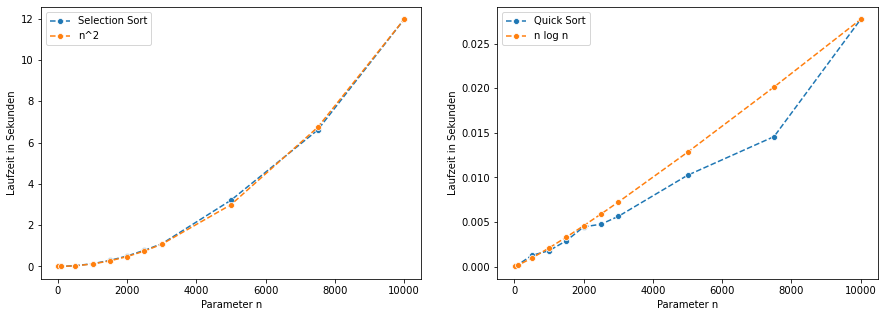

In [34]:
# Hier kommen die Plots!

n_squared = arrar_sizes*np.array(arrar_sizes)
n_log_n = arrar_sizes*np.log(arrar_sizes)

C_s = s_times[-1] / n_squared[-1]
C_q = q_times[-1] / n_log_n[-1]


# Create two plots with s_times and q_times and their respective complexity in seaborn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(x = arrar_sizes, y = s_times, label="Selection Sort", linestyle="dashed", marker="o", ax=ax1)
sns.lineplot(x = arrar_sizes, y = q_times, label="Quick Sort", linestyle="dashed", marker="o", ax=ax2)
sns.lineplot(x = arrar_sizes, y = C_s*n_squared, label="n^2", linestyle="dashed", marker="o", ax=ax1)
sns.lineplot(x = arrar_sizes, y = C_q*n_log_n, label="n log n", linestyle="dashed", marker="o", ax=ax2)
ax1.set_xlabel("Parameter n")
ax1.set_ylabel("Laufzeit in Sekunden")
# ax1.legend()
ax2.set_xlabel("Parameter n")
ax2.set_ylabel("Laufzeit in Sekunden")
# ax2.legend()

print("Konstante für Selection Sort: ", C_s)
print("Konstante für Quick Sort: ", C_q)


#### 8. Vergleichen Sie die Laufzeit ihrer effizienten Implementierungen mit der Laufzeit der Ihrer Python Implementierung

Da Haskell eine pure funktionale Programmiersprache ist, ist es nicht wirklich möglich, die Laufzeit geschickt zu messen.
Daher haben wir uns entschieden, Haskells ghci mit der Option `:set +s` zu verwenden, um die Laufzeit manuell zu messen.
Die Präzision ist aber nicht wirklich hoch, weswegen wir für `n` große Werte verwenden.

In [35]:
n_values = [500000, 1000000, 2000000, 2500000, 3000000, 5000000, 7000000, 10000000]
haskell_q_times = [0.79, 1.49, 3.05, 3.77, 4.66, 6.17, 8.54, 12.76]
python_q_times = []

for n in n_values:
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=n) 

    start = time.time()

    quickSort(array)

    end = time.time()
    
    # print array size and time of quicksort
    print(n, end-start)
    python_q_times.append(end-start)

500000 1.9676649570465088
1000000 4.440506219863892
2000000 10.295121431350708
2500000 12.628274202346802
3000000 15.411312580108643
5000000 31.027194261550903
7000000 45.895209312438965
10000000 72.59970784187317


Text(0, 0.5, 'Laufzeit in Sekunden')

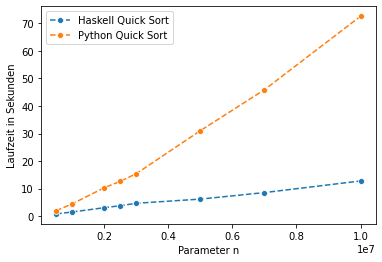

In [36]:
# haskell_q_times = [0.79, 1.49, 3.05, 3.77, 4.66, 6.17, 8.54, 12.76]

sns.lineplot(x = n_values, y = haskell_q_times, label="Haskell Quick Sort", linestyle="dashed", marker="o") 
sns.lineplot(x = n_values, y = python_q_times, label="Python Quick Sort", linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

#### 9. Vergleichen Sie die Laufzeit ihrer effizienten Implementierungen mit der Laufzeit der nativen sort() Funktion für Listen in Python

In [37]:
# Hier kommt eure Laufzeitanalyse!
python_native_times = []

for n in n_values:
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=n) 

    start = time.time()

    array.sort()

    end = time.time()
    
    # print array size and time of quicksort
    print(n, end-start)
    python_native_times.append(end-start)


500000 0.03769063949584961
1000000 0.0799870491027832
2000000 0.1611006259918213
2500000 0.19953012466430664
3000000 0.2479722499847412
5000000 0.41667628288269043
7000000 0.5937454700469971
10000000 0.8611834049224854


Konstante für Haskell Quick Sort:  7.916567984407847e-08
Konstante für Python Quick Sort:  4.5042360719305367e-07


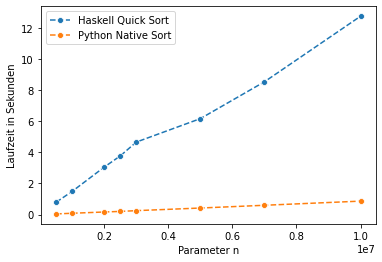

In [40]:
sns.lineplot(x = n_values, y = haskell_q_times, label="Haskell Quick Sort", linestyle="dashed", marker="o") 
sns.lineplot(x = n_values, y = python_native_times, label="Python Native Sort", linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

big_n_log_n = n_values*np.log(n_values)

C_haskell = haskell_q_times[-1] / big_n_log_n[-1]
C_python = python_q_times[-1] / big_n_log_n[-1]

print("Konstante für Haskell Quick Sort: ", C_haskell)
print("Konstante für Python Quick Sort: ", C_python)

Wir sehen, dass sich die Haskell-Implementierung von Quicksort von der Nativen Python Sortierung um circa einen Faktor 10 unterscheidet.